IMPLEMENTATION DES DIFFERENTS ALGORITHMES 

 J'utilise une approche objet : chaque morceau sera une classe, et des instances (des objets) seront utilisées pour toutes les composantes.

In [21]:
import numpy as np

class UCB1 :
    """we create a new type of object called UCB1 with 
    Attributes:
    _ _ _ _ _ _  
    n_arms:int the number of arms"""
    def __init__(self, n_arms):
        self.n_arms = n_arms  # numbers of arms
        self.counts = np.zeros(n_arms) # for any arms we store  the number of time that it was played in this numpy table initialize by full zeros
        self.values = np.zeros(n_arms) # we also done that for store the average for all arms
        self.total_counts = 0 # for store the moment t step by step

    def select_arm(self):

        """This methode return the maximum value of the upper bound cumullative"""
        if self.total_counts < self.n_arms:
            #chaque bras est joué une fois: c'est le tir initial
            return self.total_counts
        else:
            UCB1_values = self.values + np.sqrt(2 * np.log(self.total_counts) / self.counts)
            return np.argmax(UCB1_values)    

    def update(self, chosen_arm, reward):
        """ this methode is used to update our algorithm it is an recursive methode
        intput:
                - chosen_arm : is the arm considered as chosen
                - reward is the reward ontained through the choise  of the  arm called chosen_arm  """

        self.counts[chosen_arm] += 1
        self.total_counts += 1
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        new_value = ((n-1)/n)*value + (1/n)*reward #  il s'agit de la mise a jour de la moyenne empirique
        self.values[chosen_arm] = new_value

    




Simulation de l'algorithme

Nous souhaitons maintenant implémenter l’algorithme UCB1 et générer des graphes de regret, en considérant des récompenses de type Bernoulli. Pour cela, nous considérons le cas de K=2 bras, c’est-à-dire deux sources de récompenses aléatoires :

Le premier bras génère des observations issues d’une variable aléatoire 𝑋∼Bernoulli(1/3), Le second bras génère des observations(recompenses) issues d’une variable aléatoire Y∼Bernoulli(1/4) 

Recompense moyenne: 0.3
Bras sélectionnés: [726. 274.]
300
[np.float64(0.0), np.float64(0.08333333333333337), np.float64(0.08333333333333337), np.float64(0.08333333333333326), np.float64(0.08333333333333326), np.float64(0.16666666666666674), np.float64(0.16666666666666652), np.float64(0.16666666666666652), np.float64(0.16666666666666696), np.float64(0.25), np.float64(0.25), np.float64(0.25), np.float64(0.25), np.float64(0.33333333333333304), np.float64(0.41666666666666696), np.float64(0.5), np.float64(0.583333333333333), np.float64(0.5833333333333339), np.float64(0.666666666666667), np.float64(0.6666666666666661), np.float64(0.666666666666667), np.float64(0.666666666666667), np.float64(0.6666666666666661), np.float64(0.75), np.float64(0.8333333333333321), np.float64(0.9166666666666661), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.083333333333334), np.float64(1.0833333333333321), np.float64(1.083333333333334), np.flo

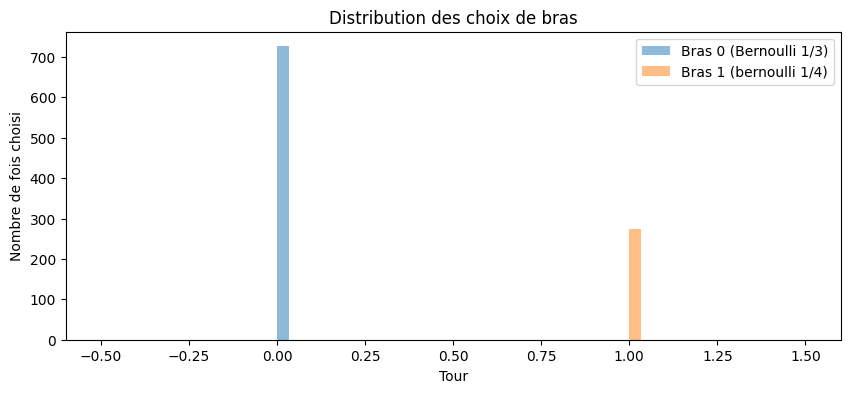

In [22]:
import matplotlib.pyplot as plt


def distribution_reward(arm):
        if arm == 0:
            reward = np.random.binomial(1, 1/3) # une bernoulli
        elif arm == 1:
            reward = np.random.binomial(1, 1/4) # une bernoulli est une binomial 1
        else:
            raise ValueError(f"Arm {arm} invalide. Il faut arm == 0 ou 1.")    
        return reward


n_rounds = 1000
algo = UCB1(n_arms=2)
rewards = []
chosen_arms = []
# Espérances des bras (estimées théoriquement)
mu = [1/3, 1/4]  
mu_star = max(mu)
regrets = []
regrets_tru = []
cumulative_reward = 0

#simulation
for t in range(1, n_rounds+1):
    arm = algo.select_arm()
    reward = distribution_reward(arm)
    algo.update(arm, reward)
    rewards.append(reward)
    chosen_arms.append(arm)
    cumulative_reward += reward
    
     


    # Regret cumulé à t
    estimated_regret = mu_star * t - cumulative_reward #counts
    regrets.append(estimated_regret)
    tru_regret = mu_star * t - np.sum(np.dot(mu, algo.counts))
    regrets_tru.append(tru_regret)
# on montre les resultats

print("Recompense moyenne:", np.mean(rewards))
print("Bras sélectionnés:", algo.counts)
print(cumulative_reward)
print(regrets_tru)

# Visualisation
plt.figure(figsize=(10,4))
plt.hist([a for i, a in enumerate(chosen_arms) if a == 0], bins=30, alpha=0.5, label="Bras 0 (Bernoulli 1/3)")
plt.hist([a for i, a in enumerate(chosen_arms) if a == 1], bins=30, alpha=0.5, label="Bras 1 (bernoulli 1/4)")
plt.legend()
plt.title("Distribution des choix de bras")
plt.xlabel("Tour")
plt.ylabel("Nombre de fois choisi")
plt.show()

Le bras en bleu est le plus souvent choisit, ce qui concorde bien avec l'intuition car elle a une probabilité plus élevé comme paramètre

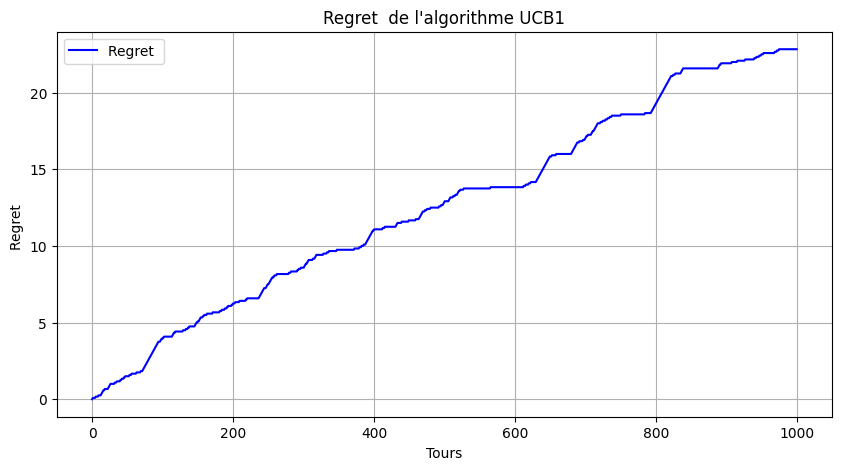

In [23]:
# Affichage : courbes de regret
plt.figure(figsize=(10,5))
plt.plot(regrets_tru, label="Regret ", color='blue')
plt.xlabel("Tours")
plt.legend()
plt.ylabel("Regret ")
plt.title("Regret  de l'algorithme UCB1")
plt.grid(True)
plt.show()

 Définition :   On définit le regret cumulé après t  tours  comme :
    $
    R(t) = t\mu^* - \sum_{i=1}^K \mu_i\mathbb{E}[T_{i}(n)]
    $
    où $ \mu^* = \max_{i=1,\dots,K} \mu_i $ est la récompense moyenne maximale et $ T_{i}(n) $ est le nombre de fois que  le bras i a éte choisit parmis les $ n $ tours.

Il mesure ce qu’on a perdu en ne jouant pas toujours le meilleur bras.

La courbe est croissante, mais de plus en plus plate

Si le regret est plat, ça veut dire que l’algorithme a appris le bon bras.

Si le regret continue à augmenter vite, l'algorithme n'apprend pas bien.